# NORM NETWORK BUILT ON 658 STUDY SUBREDDITS AND SUBSAMPLES

USING ALL 658 SUBREDDITS IN NETWORK
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 658
Number of edges: 950
Average degree:   2.8875
Density:  0.004395034998357645
False
Triadic closure: 0.22070211667527104
Network diameter of largest component: 34
['2007scape', 'ABCDesis', 'AdviceAnimals', 'Amateur', 'Anarchism', 'ApocalypseRising', 'Art', 'AskMen', 'AskOuija', 'AskReddit', 'AskThe_Donald', 'AskVet', 'AskWomen', 'BDSMcommunity', 'BigBrother', 'BikiniBottomTwitter', 'BitcoinAll', 'BlackPeopleTwitter', 'Boobies', 'BravoRealHousewives', 'BreedingDittos', 'BustyPetite', 'CFBOffTopic', 'CFBStreams', 'CODZombies', 'Catholicism', 'Celebs', 'ClashRoyale', 'CollegeBasketball', 'Comcast', 'Cricket', 'CringeAnarchy', 'DBZDokkanBattle', 'DBZDokkanMarketplace', 'DC_Cinematic', 'DCcomics', 'DarkNetMarkets', 'DerekSmart', 'DestinyTheGame', 'DotA2', 'Drugs', 'EliteDangerous', 'EnoughTr

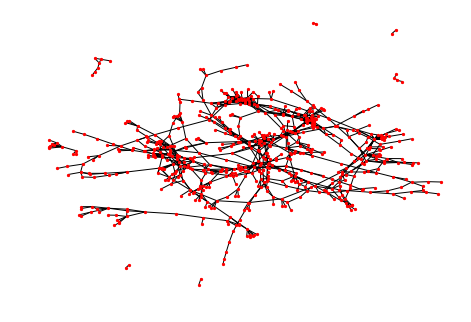

In [367]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('xor-inter-subreddit-agreement.csv')

# subsample = "bottom"
# subsample = "top"
subsample = "all"

limit = 100

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = 995/1000
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)

plt.savefig(subsample + '.pdf')

ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 107
Average degree:   2.1400
Density:  0.021616161616161617
False
Triadic closure: 0.08157099697885196
Network diameter of largest component: 8
['2007scape', 'DestinyTheGame', 'GetMotivated', 'GlobalOffensive', 'GlobalOffensiveTrade', 'OldSchoolCool', 'Overwatch', 'TheSilphRoad', 'anime', 'aww', 'explainlikeimfive', 'funny', 'gifs', 'hearthstone', 'jailbreak', 'leagueoflegends', 'nosleep', 'pics', 'pokemongo', 'tifu', 'videos']




['Android', 'BlackPeopleTwitter', 'DIY', 'EnoughTrumpSpam', 'IAmA', 'Incels', 'LateStageCapitalism', 'LifeProTips', 'PurplePillDebate', 'SandersForPresident', 'ShitRedditSays', 'SubredditDrama', 'TwoXChromosomes', 'UpliftingNews', 'atheism', 'canada', 'conspiracy', 'creepyPMs', 'europe', 'fantasyfootball', 'hillar

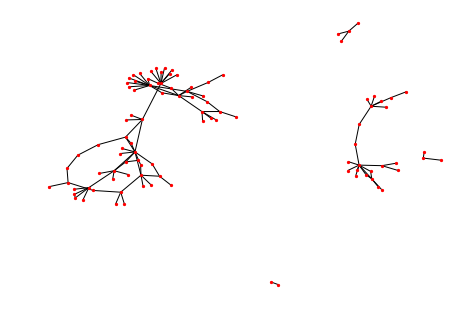

In [368]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('xor-inter-subreddit-agreement.csv')

# subsample = "bottom"
subsample = "top"
# subsample = "all"

limit = 100

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = 995/1000
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)

plt.savefig(subsample + '.pdf')

ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 118
Average degree:   2.3600
Density:  0.02383838383838384
False
Triadic closure: 0.2202797202797203
Network diameter of largest component: 15
['3DS', 'CHICubs', 'DNCleaks', 'DenverBroncos', 'Edmonton', 'Enough_Sanders_Spam', 'Liberal', 'NBA2k', 'WorldOfWarships', 'boston', 'furry', 'short', 'skyrim', 'titanfall']




['AgainstHateSubreddits', 'DebateAChristian', 'Denmark', 'DnDBehindTheScreen', 'Nootropics', 'OnePieceTC', 'TrollYChromosome', 'socialjustice101', 'torrents', 'truegaming']




['BDSMcommunity', 'GameTrade', 'GrandTheftAutoV', 'JusticePorn', 'KotakuInAction', 'LivestreamFail', 'Sat', 'Vive', 'badtattoos', 'blackpeoplegifs', 'buildapcforme', 'cosplay', 'justneckbeardthings', 'paradoxplaza', 'progresspics', 'tech']




['BikiniB

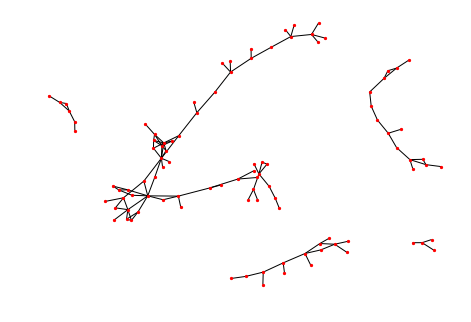

In [369]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('xor-inter-subreddit-agreement.csv')

subsample = "bottom"
# subsample = "top"
# subsample = "all"

limit = 100

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = 995/1000
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)


plt.savefig(subsample + '.pdf')

# OTHER ATTRIBUTES - INCOMPLETE

In [171]:
degree_dict = G.degree(G.nodes())
nx.set_node_attributes(G, 'degree', degree_dict)

In [172]:
print(G.node['The_Donald'])

{DegreeView({'The_Donald': 9, 'politics': 15, 'AskReddit': 3, 'science': 17, 'worldnews': 5, 'news': 11, 'explainlikeimfive': 6, 'relationships': 10, 'TwoXChromosomes': 12, 'gonewild': 19, 'hillaryclinton': 3, 'askscience': 4, 'leagueoflegends': 18, 'AskHistorians': 24, 'Games': 44, 'PoliticalDiscussion': 14, 'personalfinance': 14, 'aww': 4, 'photoshopbattles': 5, 'syriancivilwar': 3, 'nosleep': 3, 'CFB': 8, 'pcmasterrace': 5, 'pics': 10, 'pokemongo': 10, 'funny': 6, 'GlobalOffensive': 8, 'Futurology': 4, 'SandersForPresident': 5, 'MMA': 8, 'europe': 4, 'nfl': 5, 'EnoughTrumpSpam': 4, 'BlackPeopleTwitter': 6, 'pokemontrades': 23, 'legaladvice': 2, 'history': 49, 'videos': 7, 'AskWomen': 1, 'sex': 5, 'GlobalOffensiveTrade': 6, 'LateStageCapitalism': 2, 'gaming': 5, 'whatisthisthing': 2, 'Showerthoughts': 2, 'DIY': 4, 'Android': 13, 'OutOfTheLoop': 1, 'atheism': 3, 'UpliftingNews': 14, 'Incels': 1, 'gifs': 6, 'food': 6, 'movies': 27, 'india': 6, 'books': 19, 'depression': 1, 'hiphopheads

In [173]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

AttributeError: 'DegreeView' object has no attribute 'items'

In [174]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, 'betweenness', betweenness_dict)
nx.set_node_attributes(G, 'eigenvector', eigenvector_dict)

TypeError: unhashable type: 'dict'

In [175]:
betweenness_dict

{'2007scape': 0.0027938573954427184,
 '3DS': 0.0009383060378351926,
 '3dshacks': 0.0073127488010767535,
 '4chan': 0.0,
 'ABCDesis': 0.006216798760048274,
 'ADHD': 0.0006270817470072897,
 'AFL': 0.003574321561922643,
 'Addons4Kodi': 0.00014764088641443303,
 'Advice': 1.6545301775285477e-05,
 'AdviceAnimals': 0.004840084949546555,
 'AgainstHateSubreddits': 0.0018401100172453198,
 'Amateur': 0.00011624531189201063,
 'Amd': 0.00878131590120209,
 'Anarchism': 0.0004446167850304454,
 'Android': 0.005800536970754283,
 'ApocalypseRising': 0.0005389822785516903,
 'Art': 0.0014157060993332453,
 'AsiansGoneWild': 0.0,
 'AskAnAmerican': 0.0015095808779289222,
 'AskCulinary': 0.002156929476329297,
 'AskFeminists': 0.0017723293165094038,
 'AskHistorians': 0.002486409807132984,
 'AskMen': 0.0024928374363607842,
 'AskOuija': 0.001207349039911213,
 'AskReddit': 2.8396397921805746e-05,
 'AskScienceFiction': 0.00672451565152192,
 'AskSocialScience': 6.017023634936872e-05,
 'AskThe_Donald': 0.0,
 'AskTrum

In [178]:
from networkx.algorithms import community
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

AttributeError: module 'networkx.algorithms.community' has no attribute 'best_partition'

In [179]:
parts = community.k_clique_communities(G, )

TypeError: k_clique_communities() missing 1 required positional argument: 'k'

In [182]:
from networkx.algorithms.cluster import clustering

In [183]:
nx.strongly_connected_component_subgraphs(G)

NetworkXNotImplemented: not implemented for undirected type

In [224]:
tmp1 = np.loadtxt('xor-inter-subreddit-agreement.csv')

#     pickle.dump(results, open( "results.p", "wb" ) )
import pickle

with open("/Users/eshwar/Desktop/research/results.p", "rb") as f:
    tmp2 = pickle.load(f, encoding='latin1') 

In [226]:
np.allclose(tmp1, tmp2)

True

# FILTER OUT comments with > 90% agreement - 

In [227]:
#     pickle.dump(results, open( "results.p", "wb" ) )
import pickle

with open("/Users/eshwar/Desktop/research/meso-results.p", "rb") as f:
    tmp = pickle.load(f, encoding='latin1') 
    
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib as plt
%matplotlib inline

# tmp = np.loadtxt('xor-inter-subreddit-agreement.csv')
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = 95/100
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


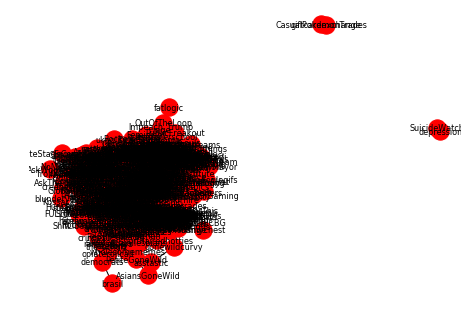

In [229]:
###load edge by edge
###alt: insert nodes one by one - 
import pandas as pd

limit = num_subs
col_subs = pd.read_csv('/Users/eshwar/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(0,limit):
    for j in range(0,limit):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')

# nx.draw(G, with_labels=True)

pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=True)
# plt.show()

In [230]:
print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

Name: 
Type: Graph
Number of nodes: 658
Number of edges: 6573
Average degree:  19.9787
Density:  0.03040901583600505
False


In [231]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.5620844462124226


Network diameter of largest component: 10


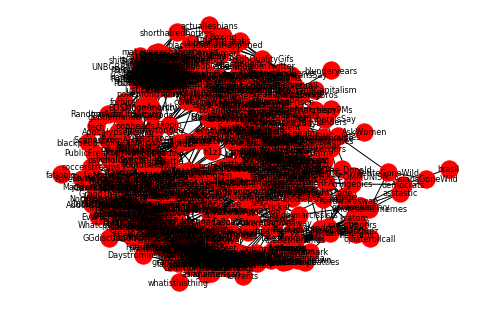

In [232]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G,scale=5)

nx.draw(subgraph,pos,font_size=8, with_labels=True)

# nx.draw(subgraph, with_labels=True)

In [233]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['2007scape',
  'ABCDesis',
  'AdviceAnimals',
  'Anarchism',
  'Android',
  'Art',
  'AskMen',
  'AskReddit',
  'AskThe_Donald',
  'AskTrumpSupporters',
  'AskWomen',
  'BigBrother',
  'BikiniBottomTwitter',
  'BlackPeopleTwitter',
  'CFB',
  'CODZombies',
  'Catholicism',
  'Christianity',
  'ClashRoyale',
  'CollegeBasketball',
  'DBZDokkanBattle',
  'DC_Cinematic',
  'DCcomics',
  'DIY',
  'DarkNetMarkets',
  'DestinyTheGame',
  'DotA2',
  'Drugs',
  'EliteDangerous',
  'EnoughTrumpSpam',
  'FIFA',
  'FULLCOMMUNISM',
  'FashionReps',
  'Fitness',
  'ForeverAlone',
  'Fuckthealtright',
  'GamerGhazi',
  'GetMotivated',
  'GlobalOffensive',
  'GlobalOffensiveTrade',
  'Guildwars2',
  'HighQualityGifs',
  'HillaryForPrison',
  'HumansBeingBros',
  'IAmA',
  'Incels',
  'Israel',
  'JUSTNOMIL',
  'Jokes',
  'Kossacks_for_Sanders',
  'LateStageCapitalism',
  'LifeProTips',
  'MMA',
  'MakingaMurderer',
  'Minecraft',
  'Mr_Trump',
  'NintendoSwitch',
  'NoFap',
  'NoMansSkyTheGame',
  

In [234]:
count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
print(count)

['2007scape', 'ABCDesis', 'AdviceAnimals', 'Anarchism', 'Android', 'Art', 'AskMen', 'AskReddit', 'AskThe_Donald', 'AskTrumpSupporters', 'AskWomen', 'BigBrother', 'BikiniBottomTwitter', 'BlackPeopleTwitter', 'CFB', 'CODZombies', 'Catholicism', 'Christianity', 'ClashRoyale', 'CollegeBasketball', 'DBZDokkanBattle', 'DC_Cinematic', 'DCcomics', 'DIY', 'DarkNetMarkets', 'DestinyTheGame', 'DotA2', 'Drugs', 'EliteDangerous', 'EnoughTrumpSpam', 'FIFA', 'FULLCOMMUNISM', 'FashionReps', 'Fitness', 'ForeverAlone', 'Fuckthealtright', 'GamerGhazi', 'GetMotivated', 'GlobalOffensive', 'GlobalOffensiveTrade', 'Guildwars2', 'HighQualityGifs', 'HillaryForPrison', 'HumansBeingBros', 'IAmA', 'Incels', 'Israel', 'JUSTNOMIL', 'Jokes', 'Kossacks_for_Sanders', 'LateStageCapitalism', 'LifeProTips', 'MMA', 'MakingaMurderer', 'Minecraft', 'Mr_Trump', 'NintendoSwitch', 'NoFap', 'NoMansSkyTheGame', 'OldSchoolCool', 'Overwatch', 'PS4', 'Patriots', 'Political_Revolution', 'ProtectAndServe', 'PurplePillDebate', 'RWBY',